## Final Project
* Hamideh Mehri
* DECEMBER 2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib import cm
import matplotlib
import numpy as np

In [2]:
def proper_round(num, dec=0):
    num = str(num)[:str(num).index('.')+dec+2]
    if num[-1]>='5':
      a = num[:-2-(not dec)]       # integer part
      b = int(num[-2-(not dec)])+1 # decimal part
      return float(a)+b**(-dec+1) if a and b == 10 else float(a+str(b))
    return float(num[:-1])

## What are customers saying about the customer service provided by the company?

In [3]:
df = pd.read_csv('tickets.csv',parse_dates=['creation_date', 'view_date', 'action_date'])

#total number of tickets
number_of_tickets = df.count()['customer_satisfaction']

#creating a dataframe for the number of different scores 
scoredf = df[['customer_satisfaction', 'ticket_type']].groupby('customer_satisfaction').count().rename(columns={'ticket_type':'number'}).sort_values(by='number',ascending=False).reset_index()

#creating a list for the percent of the scores
list_percent = (scoredf['number'] / number_of_tickets).tolist()
#round_list_percent = [round(round(num, 3)*100,1) for num in list_percent]
round_list_percent = [int(proper_round(num *100, 0)) for num in list_percent]
round_list_percent.sort()

#change the index of dataform 
scoredf['ii'] = [4,3,2,1,0]
scoredf = scoredf.set_index('ii')

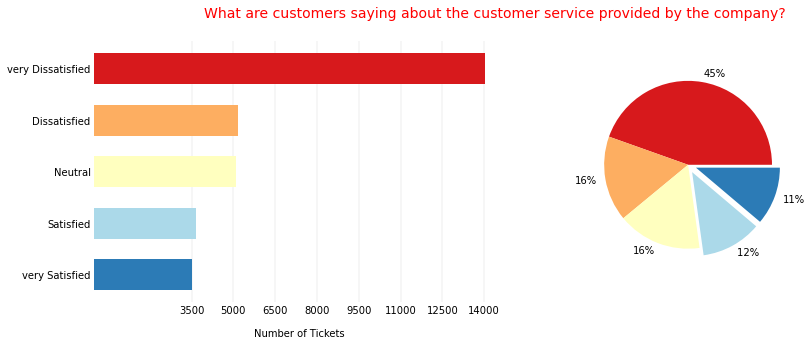

In [4]:
colors2= ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
colors =[ '#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
fig, (ax, ax1) = plt.subplots(1,2)

ax.barh(['very Satisfied','Satisfied', 'Neutral', 'Dissatisfied', 'very Dissatisfied'], scoredf['number'].sort_index(), 
        Height=0.6, align= 'center', color=colors, zorder=3)
ax.set_yticks([-0.1, 0.9, 1.9, 2.9, 3.9])

xticks1 = list(np.arange(3500,15000,1500))
ax.set_xticks(xticks1)
ax.tick_params(axis='both', which='major',length=0)
ax.xaxis.grid(zorder=0, linewidth=0.2) 
ax.set_xlabel('Number of Tickets', labelpad = 13)

# Hide the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax1.pie(list_percent, colors=colors2, explode=[0,0,0,0.1,0.1], labels=['45%','16%','16%','12% ','11%'] )

pos1_ax = ax.get_position() # get the original position 
pos2_ax = [pos1_ax.x0 +0.3 , pos1_ax.y0 + 0.3,  pos1_ax.width *2.7, pos1_ax.height *1.2 ] 
ax.set_position(pos2_ax) # set a new position

pos1_ax1 = ax1.get_position() # get the original position 
pos2_ax1 = [pos1_ax1.x0 + 0.9, pos1_ax1.y0+0.3 ,  pos1_ax1.width *2.0, pos1_ax1.height +0.2 ] 
ax1.set_position(pos2_ax1) # set a new position

ax1.text(-2.3, 1.8, 'What are customers saying about the customer service provided by the company?', ha='center', va='center'
         , fontsize=14, color='red')
fig.savefig('diagram1.pdf')

## Is there  any relation between customer satisfaction/dissatisfaction and the fact that the customer’s problem is resolved or not?

In [5]:
# extracting two dataframes for resolved tickets and not resolved tickets
df_resolved = df[df['customer_problem_resolved'] == True]
df_noresolved = df[df['customer_problem_resolved'] == False]



#the number of tickets obtain different scores
df_resolved = df_resolved[['customer_satisfaction','ticket_type']].groupby('customer_satisfaction').count().rename(columns={'ticket_type':'number-of-ticket'}).reset_index()
df_noresolved = df_noresolved[['customer_satisfaction','ticket_type']].groupby('customer_satisfaction').count().rename(columns={'ticket_type':'number-of-ticket'}).reset_index()

#finding the number of tickets that are resolved and not resolved
resolv_ticket = df_resolved['number-of-ticket'].sum()
noresolv_ticket = df_noresolved['number-of-ticket'].sum()

#the percentage of tickets that are resolved and not resolved
resolv_ticket_perc = int(proper_round((resolv_ticket / number_of_tickets) * 100, 0))
noresolv_ticket_perc =int(proper_round((noresolv_ticket / number_of_tickets) * 100, 0))

#the percentage of tickets based on satisfaction/dissatisfaction based on resolved/not resolved
resolv_dissatisfied_and_neutral = int(proper_round(((df_resolved['number-of-ticket'][0:3].sum())/resolv_ticket)*100, 0))
resolv_satisfied = int(proper_round(((df_resolved['number-of-ticket'][3:5].sum())/resolv_ticket)*100, 0))

noresolv_dissatisfied_and_neutral = int(proper_round(((df_noresolved['number-of-ticket'][0:3].sum())/noresolv_ticket)*100, 0))
noresolv_satisfied = int(proper_round(((df_noresolved['number-of-ticket'][3:5].sum())/noresolv_ticket)*100, 0))

#among the resolved(not-resolved) tickets, how many received score i 
resolved = [df_resolved['number-of-ticket'][i] for i in range(0,5)]
notresolved = [df_noresolved['number-of-ticket'][i] for i in range(0,5)]

#the percentage of tickets based on the score based on resolved/not resolved
def labelfunctionresolv(i):
    return  str(int(proper_round(((df_resolved['number-of-ticket'][i].sum())/resolv_ticket)*100, 0))) + '%'
    

def labelfunctionnotresolv(i):
    return str(int(proper_round(((df_noresolved['number-of-ticket'][i].sum())/noresolv_ticket)*100, 0))) + '%'

In [6]:
#normalizing data to 2 pi
resolved_normalized = [num/number_of_tickets*2*np.pi for num in resolved]
notresolved_normalized = [num/number_of_tickets*2*np.pi for num in notresolved]

# length of the arcs on the outer circle
final = [0] + resolved_normalized + notresolved_normalized

#the position of the arcs on the outer circle
leftin = np.cumsum(final[:-1])

arc1 = np.sum(resolved_normalized)
arc2 = np.sum(notresolved_normalized)

leftout = [0, arc1 ]

inner_colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6','#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']

findex =list(range(0,5)) + list(range(0,5))

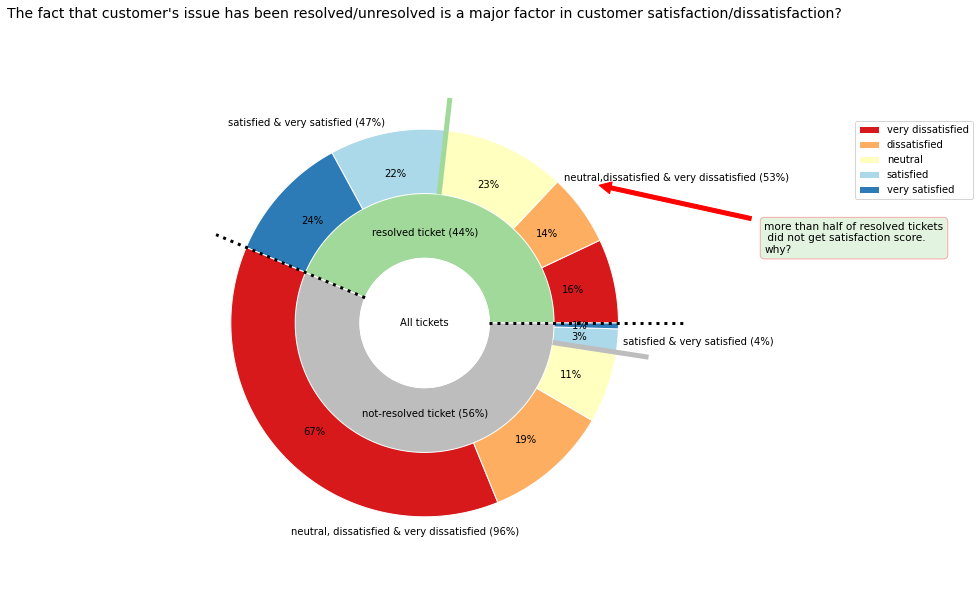

In [7]:
size =2
fig3, ax3 = plt.subplots(figsize =(14, 10), subplot_kw = dict(polar = True)) 

#plotting outer polar bar plot
ax3.bar(x = leftin, width = final[1:], bottom = -0.01, 
       height = size + 1, 
       color = inner_colors, 
       edgecolor = 'w', 
       linewidth = 1, 
       align ="edge") 


#labeling
for rect, i in zip(ax3.patches[0:5], list(range(0,5))):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = labelfunctionresolv(i)
    label_x = x + width / 2 
    label_y = y + height / 2 +0.2
    ax3.text(label_x, label_y, label_text, ha='center', va='center')
    
#labeling
for rect, i in zip(ax3.patches[5:10], list(range(0,5))):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = labelfunctionnotresolv(i)
    label_x = x + width / 2 
    label_y = y + height / 2 + 0.3
    ax3.text(label_x, label_y, label_text, ha='center', va='center')    
    
#labeling
rec = ax3.patches[4]
height = rec.get_height()
width = rec.get_width()
x = rec.get_x()
y = rec.get_y()
label_text = 'satisfied & very satisfied'+' ('+ str(resolv_satisfied) + '%' + ')'
label_x = x + width / 2 - 0.3
label_y = y + height / 2 + 2.7
ax3.text(label_x, label_y, label_text, ha='center', va='center')

#labeling
rec = ax3.patches[0]
height = rec.get_height()
width = rec.get_width()
x = rec.get_x()
y = rec.get_y()
label_text = 'neutral,dissatisfied & very dissatisfied'+' ('+ str(resolv_dissatisfied_and_neutral) + '%' + ')'
label_x = x + width / 2 + 0.3
label_y = y + height / 2 + 4.5
ax3.text(label_x, label_y, label_text, ha='center', va='center')

#labeling
rec = ax3.patches[-3]
height = rec.get_height()
width = rec.get_width()
x = rec.get_x()
y = rec.get_y()
label_text = 'satisfied & very satisfied'+' ('+ str(noresolv_satisfied) + '%' + ')'
label_x = x + width / 2 + 0.27
label_y = y + height / 2 + 4
ax3.text(label_x, label_y, label_text, ha='center', va='center')

#labeling
rec = ax3.patches[-5]
height = rec.get_height()
width = rec.get_width()
x = rec.get_x()
y = rec.get_y()
label_text = 'neutral, dissatisfied & very dissatisfied'+' ('+ str(noresolv_dissatisfied_and_neutral) + '%' + ')'
label_x = x + width / 2 + 0.7
label_y = y + height / 2 + 2
ax3.text(label_x, label_y, label_text, ha='center', va='center')



#drawing line
ymax = [1, 1, 1, 4, 1,1, 1, 1, 1, 1]
ax3.vlines(leftin, 1, ymax, colors='#a1d99b', linestyle='solid', linewidth=5)

#drawing line
ymax = [1, 1, 1, 1, 1,1, 1, 1, 4, 1]
ax3.vlines(leftin, 1, ymax, colors='#bdbdbd', linestyle='solid', linewidth=5)

#plotting inner polar bar plot
ax3.bar(x=leftout, width=[arc1,arc2], height = size, color=['#a1d99b','#bdbdbd'], bottom = -1,  edgecolor =['white','white'], linewidth = 1, 
        align ="edge") 

#drawing line
ax3.vlines([0, arc1], [-1,-1], [5,4], colors='black', linestyle='dotted', linewidth=3)

#labeling
label1 = ['resolved ticket' + ' ('+ str(resolv_ticket_perc) + '%' + ')', 
          'not-resolved ticket'+ ' ('+ str(noresolv_ticket_perc) + '%' + ')']
for rect, label in zip(ax3.patches[10:12], label1):
    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = label
    label_x = x + width / 2 +0.2
    label_y = y + height / 2 -0.2
    ax3.text(label_x, label_y, label_text, ha='center', va='center')
    
#plotting the innermost white circle   
ax3.bar(x=[0], width=[arc1+arc2], height = size, color=['white'], bottom = -3,  edgecolor =['w'], linewidth = 1, 
        align ="edge") 

#labeling
rect = ax3.patches[12]
height = rect.get_height()
width = rect.get_width()
x = rect.get_x()
y = rect.get_y()
label_text = 'All tickets'
label_x = x + width / 2 + 1
label_y = y + height / 2 - 1
ax3.text(label_x, label_y, label_text, ha='center', va='center')

ax3.set_axis_off() 

bars = ax3.patches
ax3.legend(bars, ['very dissatisfied','dissatisfied','neutral','satisfied','very satisfied'], bbox_to_anchor=[1.4, 0.8],
          loc='center', borderaxespad=0.25)

ax3.annotate('more than half of resolved tickets\n did not get satisfaction score.\nwhy?',
            xy=(0.7, 3.7),  # theta, radius
            xytext=(0.78, 0.58),    # fraction, fraction
            textcoords='figure fraction',fontsize=10.5,
            arrowprops=dict(facecolor='red', shrink=0.05, edgecolor='red'), 
            bbox=dict(boxstyle='round,pad=0.4', fc='#a1d99b', alpha=0.3, ec='red'))
ax3.set_title('The fact that customer\'s issue has been resolved/unresolved is a major factor in customer satisfaction/dissatisfaction?'
              , fontsize=14 )
fig3.savefig('diagram2.pdf')

we see that 96 percent of the not resolved tickets do not get the score 4 and 5 ( satisfied and very satisfied), so one of the reasons the customers are not satisfied is that their problems are not resolved. so we expect the same trend regarding the resolved ticket . we expect that most of the resolved tickets get the score 4 and 5 , but we see that only 47 percent of the resolved tickets get the score 4 and 5, and 53 percent of the customers who their problems resolved, are neutral, disssatisfied or very dissatisfied.so we want to explore why this is the case. one thing that come to mind is comparing these two categories of data: the resolved tickets which recieve score (1,2,3) and the resolved tickets which receive score (4,5) . I comare these two categories of data in terms of the response time. 

## Exploring the data to answer "why" in the previous diagram

## First, for the resolved tickets, I compare the response time of two categories of tickets:
* those get the score 1,2,3   and those get the score 4,5

In [8]:
#creating a column for response time in the dataframe
df['duration'] = df['action_date'] - df['creation_date']
df['duration2'] = df['view_date'] - df['creation_date']
df['duration3'] = df['action_date'] - df['view_date']

#convert responsetime to hours
df['durationhour'] = df['duration'] / pd.Timedelta(hours=1)
df['durationhour2'] = df['duration2'] / pd.Timedelta(hours=1)
df['durationhour3'] = df['duration3'] / pd.Timedelta(minutes=1)

#create two columns for date and month
df['date'] = df['creation_date'].dt.date
df['Month'] = pd.DatetimeIndex(df['date']).month


#extracting the tickets resolved, and put them in two different categories:score1,2,3 and score 4,5
df_negative = df[(df['customer_problem_resolved'] == True) & (df['customer_satisfaction'].isin([1,2,3]))]
df_positive = df[(df['customer_problem_resolved'] == True) & (df['customer_satisfaction'].isin([4,5]))]

#filter the obtained dataframe to those their response time are below 15 days
df_negative = df_negative[df_negative['duration'] < pd.Timedelta(days=15)]
df_positive = df_positive[df_positive['duration'] < pd.Timedelta(days=15)]

#convert the response time to hours
data_dissatisfied = df_negative['durationhour']
data_satisfied = df_positive['durationhour']


df_negative['satisfaction'] ='very dissatisfied, dissatisfied & neutral'
df_positive['satisfaction'] = 'satisfied & very satisfied'

data_dissatisfied_seaborn = df_negative[['satisfaction','durationhour']]
data_satisfied_seaborn = df_positive[['satisfaction','durationhour']]

df_seaborn_box = pd.concat([data_dissatisfied_seaborn, data_satisfied_seaborn])

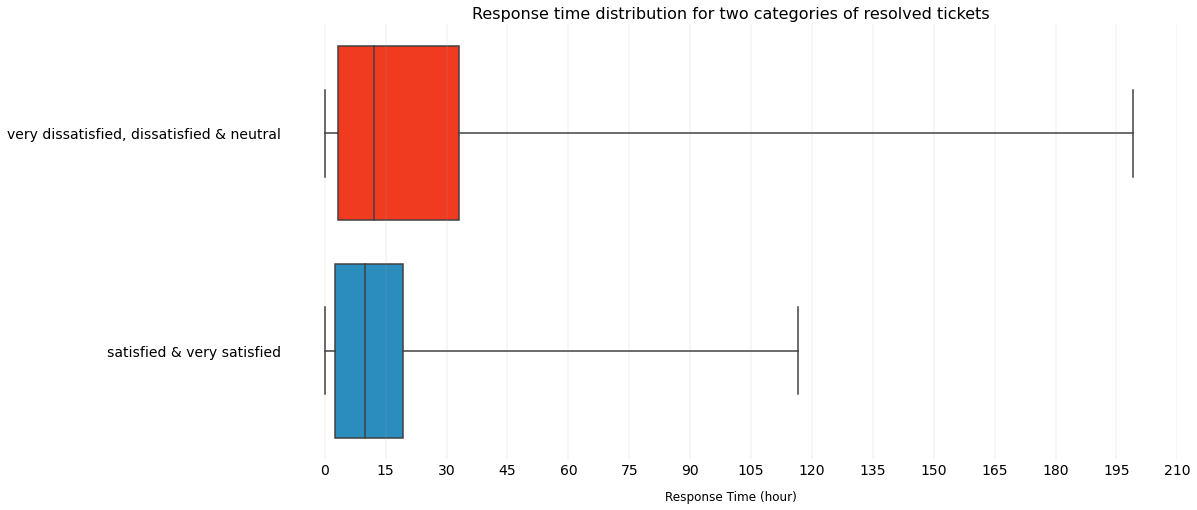

In [9]:
fig2, ax2 = plt.subplots(figsize=(16,8))
sns.boxplot(x = 'durationhour', y = 'satisfaction', data = df_seaborn_box, ax=ax2,boxprops={'facecolor':'None'}, 
            showfliers=False, whis=[0,95])

#set color for boxes
color_dict = {'satisfied & very satisfied':'#f03b20', 'very dissatisfied, dissatisfied & neutral': '#2b8cbe'}
mybox = ax2.artists[0]
mybox.set_facecolor(color_dict['satisfied & very satisfied'])
mybox = ax2.artists[1]
mybox.set_facecolor(color_dict['very dissatisfied, dissatisfied & neutral'])

ax2.set(xlabel = 'Response Time (hour)', ylabel='')
ax2.set_xticks(range(0,225,15))
ax2.set_xlabel('Response Time (hour)', labelpad=13, fontsize=12)
ax2.tick_params(axis='both', which='major',length=0)
ax2.xaxis.grid(zorder=0, linewidth=0.2) 
ax2.set_title('Response time distribution for two categories of resolved tickets',fontsize=16)

ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Hide the spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

## Is the above pattern exists for the whole tickets(both resolved and not resolved)?

In [10]:
df_filter = df[df['duration'] < pd.Timedelta(days=15)]

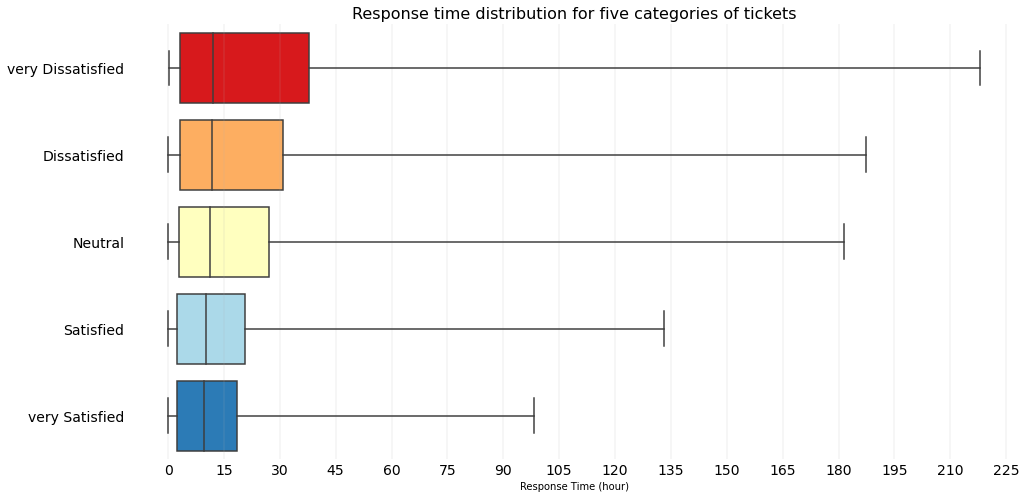

In [11]:
fig3, ax3 = plt.subplots(figsize=(16,8))
sns.boxplot(y = 'customer_satisfaction', x = 'durationhour', data = df_filter, ax=ax3,boxprops={'facecolor':'None'}, 
            showfliers=False, whis=[0,95], orient='h')

#set color for boxes
colors =[ '#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
color_dict = {1:'#d7191c', 2:'#fdae61', 3:'#ffffbf', 4:'#abd9e9', 5:'#2c7bb6' }
for i in range(1,6):
    mybox = ax3.artists[i-1]
    mybox.set_facecolor(color_dict[i])
    
ax3.set(xlabel = 'Response Time (hour)', ylabel='')
ax3.set_xticks(range(0,230,15))
ax3.set_yticklabels(['very Dissatisfied', 'Dissatisfied','Neutral','Satisfied', 'very Satisfied'])

ax3.tick_params(axis='both', which='major',length=0)
ax3.xaxis.grid(zorder=0, linewidth=0.2) 
ax3.set_title('Response time distribution for five categories of tickets',fontsize=16)

ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

# Hide the spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)


## which one has made problem? the difference between view date and creation data , or the difference between action-date and view-date?

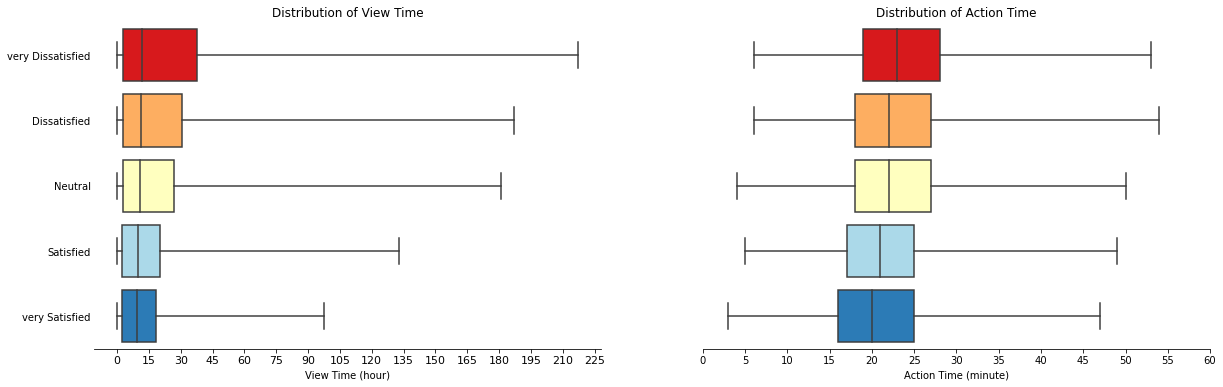

In [12]:
fig5, (ax3, ax4) = plt.subplots(1,2,figsize=(20,6), sharey=True)
sns.boxplot(y = 'customer_satisfaction', x = 'durationhour2', data = df_filter, ax=ax3,boxprops={'facecolor':'None'}, 
            showfliers=False, whis=[0,95], orient='h')

#set color for boxes
colors =[ '#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
color_dict = {1:'#d7191c', 2:'#fdae61', 3:'#ffffbf', 4:'#abd9e9', 5:'#2c7bb6' }
for i in range(1,6):
    mybox = ax3.artists[i-1]
    mybox.set_facecolor(color_dict[i])
    
ax3.set(xlabel = 'View Time (hour)', ylabel='')
ax3.set_xticks(range(0,230,15))
ax3.set_yticklabels(['very Dissatisfied', 'Dissatisfied','Neutral','Satisfied', 'very Satisfied'])
ax3.set_title('Distribution of View Time')
ax3.tick_params(axis='y', which='major',length=0)
ax3.tick_params(axis='x', labelsize=11)

# Hide the spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

sns.boxplot(y = 'customer_satisfaction', x = 'durationhour3', data = df_filter, ax=ax4,boxprops={'facecolor':'None'}, 
            showfliers=False, whis=[0,100], orient='h')

#set color for boxes
colors =[ '#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
color_dict = {1:'#d7191c', 2:'#fdae61', 3:'#ffffbf', 4:'#abd9e9', 5:'#2c7bb6' }
for i in range(1,6):
    mybox = ax4.artists[i-1]
    mybox.set_facecolor(color_dict[i])
    
ax4.set(xlabel = 'Action Time (minute)', ylabel='')
ax4.set_xticks((0,5,10,15,20,25,30,35,40,45,50,55,60))
ax4.set_yticklabels(['very Dissatisfied', 'Dissatisfied','Neutral','Satisfied', 'very Satisfied'])
ax4.set_title('Distribution of Action Time')
ax4.tick_params(axis='y', which='major',length=0)
ax4.tick_params(axis='x', labelsize=10)

# Hide the spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
#ax4.spines['bottom'].set_visible(False)

* As we can see, it is the time difference between view and creation that has an effect on customer satisfaction/dissatisfaction. One possible explanation is the high volume of tickets. In other words, on some days, the volume of tickets may be so great that viewing them may be delayed. With this curiosity, I'm examining the relationship between ticket volume and customer satisfaction/dissatisfaction.

# relation between ticket volume on each day and the average score given by customers

In [13]:
datemean = df[['date','customer_satisfaction','Month']].groupby('date').mean().reset_index().rename(columns={'customer_satisfaction': 'mean_satisfaction'})
datecount =  df[['date','customer_satisfaction']].groupby('date').count().reset_index().rename(columns={'customer_satisfaction': 'totalticket'})
correlationdf = datemean.merge(datecount)

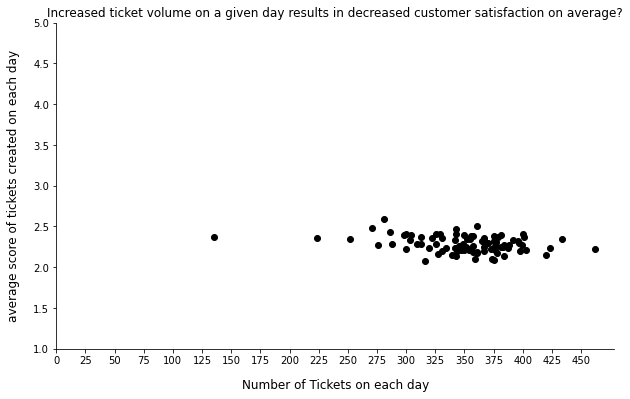

In [14]:
correlationdf['totalticket'].max()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(correlationdf['totalticket'],correlationdf['mean_satisfaction'], color='black')
ax.set_xticks(range(0,470,25))
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xlabel('Number of Tickets on each day', labelpad=13, fontsize=12)
ax.set_ylabel('average score of tickets created on each day', labelpad=13, fontsize=12)
ax.set_title('Increased ticket volume on a given day results in decreased customer satisfaction on average?')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



* the average customer satisfaction for all days is between 2 and 2.6, let's focus on the average score between 2 and 2.6 

Text(0.5, 1.0, 'The relation between ticket volume and customer satisfaction in each month')

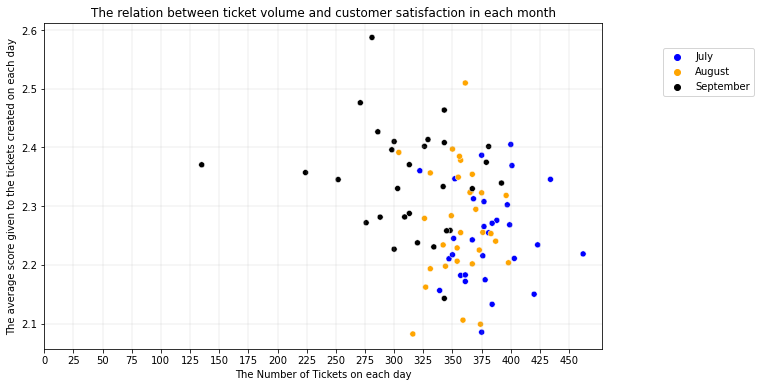

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
color={7:'blue', 8:'orange', 9:'black'}
sns.scatterplot(x='totalticket',y='mean_satisfaction', data=correlationdf, hue='Month', palette=color)
ax.set_xticks(range(0,470,25))
#ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xlabel('The Number of Tickets on each day')
ax.set_ylabel('The average score given to the tickets created on each day')

handles, labels  =  ax.get_legend_handles_labels()

ax.legend(handles, ['July', 'August', 'September'], 
          loc='center left', bbox_to_anchor=(1.1, 0.85), ncol=1)
ax.xaxis.grid(zorder=0, linewidth=0.2) 
ax.yaxis.grid(zorder=0, linewidth=0.2) 

ax.set_title('The relation between ticket volume and customer satisfaction in each month')

In [16]:
#creating a dataframe shows the number of tickets recieved on each day based on their score
daterate = df[['date','customer_satisfaction','user_actioned']].groupby(['date','customer_satisfaction']).count().reset_index().rename(columns={'user_actioned': 'totalrate'})

#merge two dataframe to have  the total number of tickets recieved on each day as a column
totaldf = daterate.merge(datecount)

#add a column show the ratio of tickets get each score on each day
totaldf['ratio'] = (totaldf['totalrate']/totaldf['totalticket']) * 100

Text(0.5, 1.0, "the ratio of ticket's labels on each day")

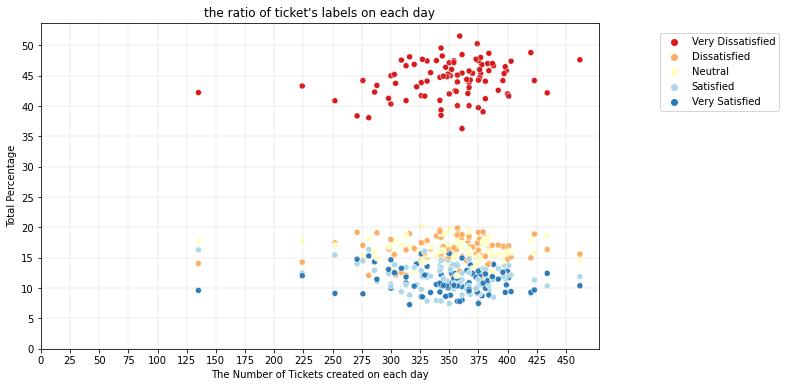

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
color_dict = {1:'#d7191c', 2:'#fdae61', 3:'#ffffbf', 4:'#abd9e9', 5:'#2c7bb6' }
sns.scatterplot(data=totaldf, x='totalticket', y='ratio', hue='customer_satisfaction', palette=color_dict)

handles, labels  =  ax.get_legend_handles_labels()

ax.legend(handles, ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'], 
          loc='center left', bbox_to_anchor=(1.1, 0.85), ncol=1)

ax.set_yticks(range(0,55,5))
ax.set_xticks(range(0,470,25))

ax.xaxis.grid(zorder=0, linewidth=0.2) 
ax.yaxis.grid(zorder=0, linewidth=0.2) 

ax.set_xlabel('The Number of Tickets created on each day')
ax.set_ylabel('Total Percentage')
ax.set_title('the ratio of ticket\'s labels on each day' )